In [1]:
cd("../")
using Pkg
Pkg.activate(".")
using SymbolicQuartetNetworkCoal

using QuartetNetworkGoodnessFit
using BenchmarkTools
using Plots

  Activating project at `~/Dropbox/SymbolicQuartetNetworkCoal.jl`
[ Info: Precompiling SymbolicQuartetNetworkCoal [4201568c-2e61-4571-8a9c-4da1ec7770d0] (cache misses: mismatched flags (18), include_dependency fhash change (2))
[ Info: Precompiling QuartetNetworkGoodnessFit [1382f7fc-2744-4d9d-8ec6-1e3efdec0746] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4))


In [2]:
aloha()

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⣤⣴⠂⢀⡀⠀⢀⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣤⣄⣠⣀⠀⠘⠋⠉⠉⠁⠀⠺⣿⡷⣿⣿⣿⡿⠀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⣿⣛⠛⠉⠀⠀⠀⠀⠺⣷⣦⠀⠀⠀⠙⠛⠉⠀⠀⠈⣿⣦⣤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣆⠀⠈⠉⠁⠀⠀⠀⠀⠀⠀⠀⠙⠉⠀⠀⢸⣦⠀⠀⠀⢀⣼⣿⣿⣿⣿⣷⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢺⣿⣿⡿⠁⠀⠀⠀ ⠀⠀⠀⠀⠀⠀  ⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣿⣿⣿⣧⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢀⡆⠈⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣤⣤⣀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣷⠄⠀⠀⠀⠀⠀
⢠⣾⣷⣦⡀⠘⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣷⣦⡀⠀⠀⠀⠀⢠⣿⣿⣿⡿⠟⠛⠋⠁⣀⣠⣤⣄⣀⠀
⠘⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⢠⣴⣾⣶⣿⣿⣿⣿⣿⣿⣟⠘⣿⣷⡀⠀⠀⠘⠿⡿⠉⠀⠀⣀⣴⣾⣿⣿⣿⣿⡿⡂
⠀⠈⠿⢟⣿⣿⣆⠀⠀⠀⠀⢀⣤⣤⣿⣿⣿⣿⣿⣎⠛⢫⣿⣿⣿⣷⡘⢿⣿⣆⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⣿⣿⡿⠛⠋⠁
⠀⠀⠀⢺⣿⣿⣿⣷⡄⠀⢰⣿⣿⣿⣯⠹⣿⣿⣿⣷⣶⡜⢿⣿⣿⣿⣷⡄⠹⣿⣷⣄⠀⠀⣴⣼⣿⣿⣿⣿⠟⠉⠀⠀⠀⠀
⠀⠀⠀⠀⠙⢻⣿⣿⣿⣦⡘⢿⣿⣿⣿⣃⠉⢿⣿⣿⣿⣿⡌⢻⣝⠻⠿⢃⡀⣿⣿⣿⣷⣶⣿⣿⣿⣿⡿⠃⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣷⣄⠛⣿⣿⣿⣿⣄⠻⣿⣿⣿⣿⡆⠙⠷⠶⠟⢠⣿⣿⣿⣿⣿⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⡇⠈⠻⣿⣿⣿⣷⠘⠧⣉⣁⡴⠀⢠⣤⣶⣿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣿⣿⣷⣄⠙⠧⣍⣩⡜⢀⣀⣀⠄⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣿⣿⣿⣷⣦⣄⣀⣤⣾⣿⣿⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠛⠻⠛⠛⠁⠉⠙⠛⠉⠉⠉⠀⠀⠀⠀ 
                Hawai'i-Five-O  


In [8]:
net=readTopologyrand("((C:1.045,A:2.29):3.432,(((G:4.359,H:5.773):6.989,(((E:7.352,F:8.907):9.854)#H2:10.618::0.398)#H1:11.05::0.719):12.599,((#H2:13.176::0.602,(B:14.007,D:15.876):16.988):17.197,#H1:18.733::0.281):19.006):20.745);")
net=readTopologyrand("((((c,(d,e)),b))#H3,(a,#H3));")

PhyloNetworks.HybridNetwork, Rooted Network
11 edges
11 nodes: 5 tips, 1 hybrid nodes, 5 internal tree nodes.
tip labels: c, d, e, b, ...
((((c:1.1,(d:2.1,e:3.1):4.1):5.1,b:6.1):7.1)#H3:8.1::0.401,(a:9.1,#H3:10.1::0.599):11.1);


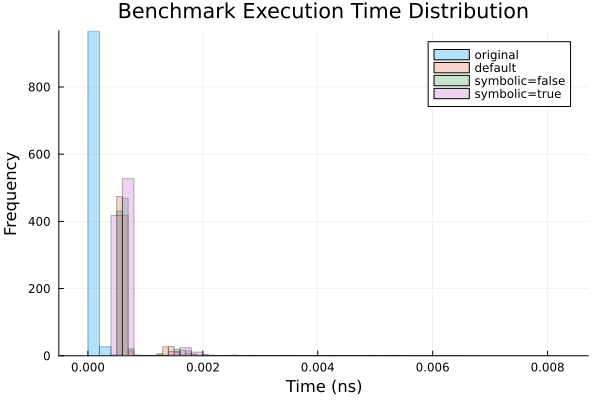

In [11]:
n = 1000
times_o = [@elapsed network_expectedCF(net; showprogressbar=false) for _ in 1:n]
times_a = [@elapsed network_expectedCF_formulas(net) for _ in 1:n]
times_b = [@elapsed network_expectedCF_formulas(net, symbolic=false) for _ in 1:n]
times_c = [@elapsed network_expectedCF_formulas(net, symbolic=true) for _ in 1:n]

histogram(
    [times_o, times_a, times_b, times_c],
    label = ["original" "default" "symbolic=false" "symbolic=true"],
    xlabel = "Time (ns)",
    ylabel = "Frequency",
    title = "Benchmark Execution Time Distribution",
    alpha = 0.3,
    bins = 50
)

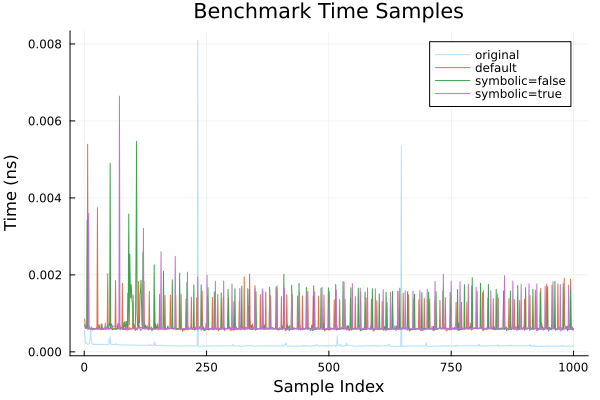

In [12]:
plot(
    times_o, label="original",
    xlabel="Sample Index", ylabel="Time (ns)",
    title="Benchmark Time Samples",
    alpha=0.3
)
plot!(times_a, label="default")
plot!(times_b, label="symbolic=false")
plot!(times_c, label="symbolic=true")